> Anubis : 

In [1]:
import os 
import pandas as pd
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')

# local :
path_project = "/media/concha-eloko/Linux/PPT_clean"

info_col = ["prot_name","start","end","domain_seq","full_seq","dpo_index"]

df_prophage_label = pd.read_csv(f"{path_project}/prophage_data.clusters_80.phageboost_70.2504.tsv" , sep = "\t", skiprows=1)
df_prophage_label.columns = ["Prophage_name","KL_type","Infected_ancestor","n_clades","siblings","n_ancestors","n_KL_swaps","old_KL_types","all_old_KL_types"]

df_anubis_return_emb = pd.read_csv(f"{path_project}/embeddings/anubis_return.esm2.embedding.csv" , sep = ",", header = None)
df_anubis_return_info = pd.read_csv(f"{path_project}/Anubis_return.predictions.0709.big.annotated.tsv" , sep = "\t", names = info_col)
anubis_sequences = df_anubis_return_info["full_seq"].unique().tolist()
len(anubis_sequences)



4308

> ppt :

In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/15122022_session/Results_III_DataFrame.v3.csv \
/media/concha-eloko/Linux/PPT_clean 


In [2]:
import pandas as pd 
import os 

path_project = "/media/concha-eloko/Linux/PPT_clean"

labels_results = ["protein_name","KL_type_ancestor","ancestor_id","IPR_entry","score","qstart","qstop","sequence"]
results_df = pd.read_csv(f"{path_project}/Results_III_DataFrame.v3.csv", sep="\t", names= labels_results)
ppt_seq_uniq = results_df["sequence"].unique().tolist()

> Minibatch : 


In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/Bea_hits.seq_unique.fasta \
/media/concha-eloko/Linux/PPT_clean 

rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/Minibatch_hits.75bits.tsv \
/media/concha-eloko/Linux/PPT_clean 


In [3]:
import pandas as pd 
import os 

path_project = "/media/concha-eloko/Linux/PPT_clean"
path_work = "/media/concha-eloko/Linux/PPT_clean"

#minibatch_seq_uniq = [item.split("\n")[1] for item in open(f"{path_project}/Bea_hits.seq_unique.fasta").read().split(">")[1:]]
DF_info_mini = pd.read_csv(f"{path_work}/Minibatch_hits.75bits.tsv", sep = "\t" ,  names = ["protein", "bitscore","sequence"])
minibatch_seq_uniq = set(seq for seq in DF_info_mini["sequence"] if len(seq)<1500)



> Final DF : 


In [4]:
path_work = "/media/concha-eloko/Linux/PPT_clean"

DF_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df.tsv", sep = "\t" ,  header = 0)
DF_lvl_0 = DF_info[~DF_info["KL_type_LCA"].str.contains("\\|")]


In [5]:
final_unique = DF_lvl_0["seq"].unique().tolist()

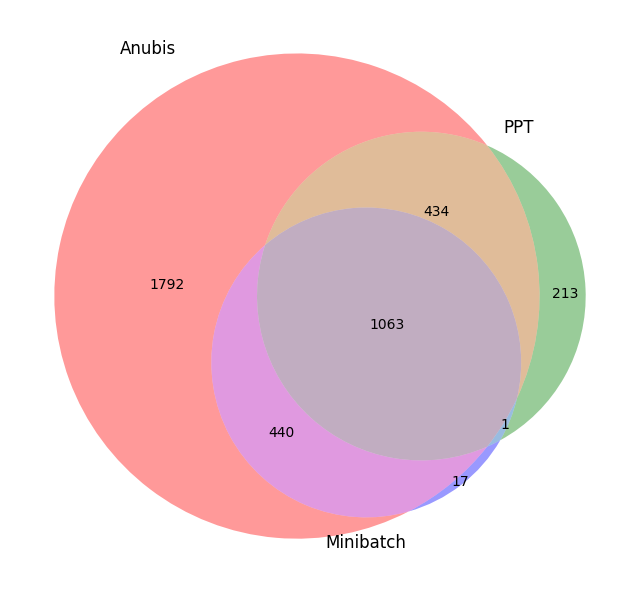

In [7]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set_anubis = set(anubis_sequences)
set_minibatch = set(minibatch_seq_uniq)
set_ppt = set(ppt_seq_uniq)
set_final = set(final_unique)

pred_anubis = set_anubis.intersection(set_final)
pred_ppt = set_ppt.intersection(set_final)
pred_minibatch = set_minibatch.intersection(set_final)


# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn3([pred_anubis, pred_ppt, pred_minibatch], ('Anubis', 'PPT', "Minibatch"))

# Display the plot
plt.show()

In [8]:
classic_methods = pred_ppt.copy()
classic_methods.update(pred_minibatch)

anubis_exclu = pred_anubis.difference(classic_methods)

In [9]:
classic_gold = classic_methods.difference(pred_anubis)
len(classic_gold)

231

In [10]:
common_classic = pred_ppt.intersection(pred_minibatch)
classic_gold = common_classic.difference(pred_anubis)


In [11]:
classic_gold

{'MAEVPLPTPTQVPVPSTDIRNAVFAGAKLDEEVTGAGEFYTDRLGVKRLTNTGRNNQFDAAQLDRANRFEQFLLSSGYVFLGDYEDGPFQFSARNQYIRYNNQYYRLNAATDVGFTTTGTDATSFANDVTHFVLMDGDTLRSNLGSSEEGMGDDIVTHSDGKTVREHIKYLERDKLSFYGSTATGLLNFLAYAAASGRECIVDTVVNLTVAVNFDAQFSNIHLRWEAPINSDTQLFNLHNLGPKSILKDMWFQNITAPWVINRWDTDGNWIDNAEIIANSVVQTNEEAGYQPTASDKDVWPLLSDTVKNQQICGGPIIHTSRGVTVLNPRGRYIAITFMDCNFCKVVQPSVMGGKHQYGTILFNNTGTTAWGKGNKVIDGEVRYGSVSGVVYMRHKGKSSRISGTNAYRCGESGFKTYQNEVNGRSARCYGMKWDNLTAEQCYFDGFDLASDYGDAAQRVDDYKLEQFAWNLLPLKHEVTNLTGLC'}

# Get the fold proportions :

In [1]:
import os 
import pandas as pd 

path_work = "/media/concha-eloko/Linux/PPT_clean"

DF_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df_v2.filtered.tsv", sep = "\t" ,  header = 0)
DF_info_light = DF_info[['Phage', 'Protein_name', 'KL_type_LCA', 'Infected_ancestor', 'index','Dataset', 'seq', 'domain_seq','prophage_id']]


In [2]:
DF_info_total = pd.read_csv(f"{path_work}/TropiGATv2.final_df_v2.tsv", sep = "\t" ,  header = 0)


In [66]:
DF_info_total[~DF_info_total["KL_type_LCA"].str.contains("\\|")]

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,1,2,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,prophage_id
0,GCF_902164905.1__phage1,GCF_902164905.1__phage1__34,KL41,GCF_902164905.1,minibatch__460,minibatch,MPATPQDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDE...,QDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDERTITT...,0.025276,0.053137,...,-0.011464,0.081105,0.012011,0.042917,0.009402,0.093175,-0.080562,0.000897,0.111854,prophage_11309
4,GCF_017310305.1__phage5,GCF_017310305.1__phage5__1353,KL30,n4996,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
10,GCF_001701985.1__phage2,GCF_001701985.1__phage2__357,KL30,n4988,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_6465
12,GCF_001611095.1__phage5,GCF_001611095.1__phage5__1365,KL30,n49894989,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
15,GCF_902156555.1__phage3,GCF_902156555.1__phage3__511,KL30,GCF_902156555.1,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21345,GCF_900407145.1__phage13,GCF_900407145.1__phage13__48,KL105,GCF_900407145.1,anubis_return__4247,anubis_return,MAEVPLPTPTQAPVPSTDIRNAVFAGAKLDEEVTGTGEFYTDRLGV...,NIASYDVTWFGAVASDDTATYTAANTVSIQNALNAAEKAGLAAVWF...,-0.002267,0.042625,...,0.013049,0.112762,0.002557,0.024400,0.066527,0.052364,-0.092847,0.054733,0.077084,prophage_8459
21346,GCF_002186895.1__phage9,GCF_002186895.1__phage9__5,KL57,GCF_002186895.1,anubis_return__4260,anubis_return,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,0.073450,0.046651,...,0.035302,0.012151,0.003563,-0.022575,0.014130,0.063376,-0.050646,-0.085156,-0.010849,prophage_6002
21347,GCF_004312845.1__phage3,GCF_004312845.1__phage3__38,KL9,GCF_004312845.1,anubis_return__4275,anubis_return,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,0.032196,0.048856,...,-0.016331,0.084711,0.056063,0.001793,0.073958,0.090169,-0.060105,0.023726,0.086452,prophage_12656
21348,GCF_900172635.1__phage2,GCF_900172635.1__phage2__1608,KL124,GCF_900172635.1,anubis_return__4287,anubis_return,MADLSISVISDQASESNQAGWWHPLDSFQGVEYYGLCKEYGTAGYH...,MADLSISVISDQASESNQAGWWHPLDSFQGVEYYGLCKEYGTAGYH...,-0.011089,-0.005328,...,0.034656,0.046130,0.012586,-0.021702,-0.023386,0.105700,-0.099147,-0.057367,0.091427,prophage_12780


***
# Check PPT :

> Get the ppt folds :

In [6]:
import pandas as pd
import os 
from tqdm import tqdm

path_project = "/media/concha-eloko/Linux/PPT_clean"
path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"
dir_out = f"{path_project}/ficheros_28032023/seekfold_PPT"

info_df = pd.read_csv(path_info , sep = "\t", header = 0)

header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]

dico_tropigat_fold = {}
# Scan the results for each pdb files :
for _, row_tropigat in DF_info_light.iterrows() :
    if row_tropigat["Dataset"] == "ppt" and row_tropigat["index"] not in dico_tropigat_fold :
        index = row_tropigat["index"].split("__")[1]
        path_output = f"{dir_out}/{index}.out"
        results_df = pd.read_csv(f"{path_output}", sep = "\t" , names = header_seekfold)
        for _, row_foldseek in results_df.iterrows() :
            fold = info_df[info_df["ID"] == row_foldseek["target"]]["Folds"].values[0]
            if fold not in ["jelly-roll", "Other"] :
                if row_foldseek["prob"] >= 0.5 :
                    dico_tropigat_fold[row_tropigat["seq"]] = fold
                    break
                elif fold == "right-handed beta-helix" and row_foldseek["prob"] >= 0.2 :
                    dico_tropigat_fold[row_tropigat["seq"]] = fold
                    break



In [7]:
len(dico_tropigat_fold)

1841

***
# Check Minibatch : 

In [8]:
import pandas as pd
import os 
from tqdm import tqdm

path_project = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023"
dir_out = f"{path_project}/seekfold_minibatch"

path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)

header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]

# Scan the results for each pdb files :
for _, row_tropigat in DF_info_light.iterrows() :
    if row_tropigat["Dataset"] == "minibatch" and row_tropigat["index"] not in dico_tropigat_fold :
        index = row_tropigat["index"].split("__")[1]
        path_output = f"{dir_out}/{index}.out"
        results_df = pd.read_csv(f"{path_output}", sep = "\t" , names = header_seekfold)
        for _, row_foldseek in results_df.iterrows() :
            fold = info_df[info_df["ID"] == row_foldseek["target"]]["Folds"].values[0]
            if fold not in ["jelly-roll", "Other"] :
                if row_foldseek["prob"] >= 0.5 :
                    dico_tropigat_fold[row_tropigat["seq"]] = fold
                    break
                elif fold == "right-handed beta-helix" and row_foldseek["prob"] >= 0.2 :
                    dico_tropigat_fold[row_tropigat["seq"]] = fold
                    break

In [17]:
len(dico_tropigat_fold)

2323

***
# Check Anubis : 

In [3]:
import json 
import os
import numpy as np
import tqdm

fold_results = json.load(open(f"/media/concha-eloko/Linux/PPT_clean/Anubis_seqouts.json"))


In [4]:
fold_anubis = {}
failed = []

folds_label = {1.0 : "beta-helix", 2.0 : "beta-propeller", 3.0 : "triple-helix"}

for protein, pred in fold_results.items() :
    if isinstance(pred, dict) == True :
        for label in pred :
            if float(label) in folds_label :
                fold = folds_label[float(label)]
                try :
                    seq_prot = DF_info_light[DF_info_light["index"] == protein]["seq"].values[0]
                    #print(seq_prot)
                    fold_anubis[seq_prot] = fold
                    break
                except Exception as e :
                    pass
    else :
        failed.append(protein)
        

In [9]:
for _, row_tropigat in DF_info_light.iterrows() :
    if row_tropigat["Dataset"].count("anubis")>0 and row_tropigat["index"] not in dico_tropigat_fold :
        dico_tropigat_fold[row_tropigat["seq"]] = fold_anubis[row_tropigat["seq"]]

In [21]:
len(dico_tropigat_fold)

3905

***

In [10]:
DF_info_light_folded = DF_info_light.copy()
DF_info_light_folded["Fold"] = DF_info_light["seq"].apply(lambda x : dico_tropigat_fold[x] if x in dico_tropigat_fold else "unknown")
DF_info_light_folded["Fold"] = DF_info_light_folded["Fold"].apply(lambda x : "6-bladed beta-propeller" if x == "beta-propeller" else x)
DF_info_light_folded["Fold"] = DF_info_light_folded["Fold"].apply(lambda x : "right-handed beta-helix" if x == "beta-helix" else x)

In [40]:
DF_info_light_folded.to_csv(f"{path_work}/TropiGAT_v2.light_folded.tsv", sep = "\t", header = True, index= False)

In [37]:
from collections import Counter

single_dpos = DF_info_light_folded.drop_duplicates(subset = ["seq"])

Counter(single_dpos["Fold"])

Counter({'right-handed beta-helix': 2722,
         '6-bladed beta-propeller': 714,
         'TIM beta/alpha-barrel': 294,
         'Alpha/Beta hydrolase fold': 114,
         'triple-helix': 32,
         'alpha/alpha toroid': 29,
         'unknown': 3})

In [57]:
single_dpos

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,prophage_id,Fold
0,GCF_902164905.1__phage1,GCF_902164905.1__phage1__34,KL41,GCF_902164905.1,minibatch__460,minibatch,MPATPQDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDE...,QDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDERTITT...,prophage_11309,right-handed beta-helix
1,GCF_017310305.1__phage5,GCF_017310305.1__phage5__1353,KL30,n4996,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,prophage_5,right-handed beta-helix
7,GCF_900622625.1__phage2,GCF_900622625.1__phage2__2892,KL6,GCF_900622625.1,minibatch__1741,minibatch,MAFNPELGSSSPEVLLDNAKRLDELTNGPAATVPDRAGEPLDSWRK...,ELGSSSPEVLLDNAKRLDELTNGPAATVPDRAGEPLDSWRKMQEDN...,prophage_4098,TIM beta/alpha-barrel
8,GCF_011044795.1__phage17,GCF_011044795.1__phage17__11,KL19,80.7/1001331,minibatch__467,minibatch,MNRSRRLLMRGIGYLTLFPLLFLFSKKVSSAPNGLTEKVKNRKIEK...,RSRRLLMRGIGYLTLFPLLFLFSKKVSSAPNGLTEKVKNRKIEKDV...,prophage_4997,right-handed beta-helix
14,GCF_019096335.1__phage21,GCF_019096335.1__phage21__173,KL25,n12421242,minibatch__15,minibatch,MYHLDNTSGVPEMPEPKEQQSISPRWFGESQEQGGISWPGADWFNT...,YHLDNTSGVPEMPEPKEQQSISPRWFGESQEQGGISWPGADWFNTV...,prophage_8486,right-handed beta-helix
...,...,...,...,...,...,...,...,...,...,...
11462,GCF_900506765.1__phage17,GCF_900506765.1__phage17__90,KL149,GCF_900506765.1,anubis_return__4216,anubis_return,MMTTLNEHPQWESDIYLIKRSDLVAGGRGGIANMQAQQLANRTAFL...,NRRWFRRFTGNIRAEWSGIHDLSQSSAPVDSYIYRLLLASAVGSPD...,prophage_15598,beta-helix
11463,GCF_003255785.1__phage1,GCF_003255785.1__phage1__10,KL127,GCF_003255785.1,anubis_return__4239,anubis_return,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,prophage_3577,beta-propeller
11464,GCF_002186895.1__phage9,GCF_002186895.1__phage9__5,KL57,GCF_002186895.1,anubis_return__4260,anubis_return,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,prophage_6002,beta-propeller
11465,GCF_004312845.1__phage3,GCF_004312845.1__phage3__38,KL9,GCF_004312845.1,anubis_return__4275,anubis_return,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,prophage_12656,beta-helix


In [58]:
single_dpos[single_dpos["Fold"] == "unknown"]

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,prophage_id,Fold
6605,GCF_002187385.1__phage21,GCF_002187385.1__phage21__2,KL25,n5171,ppt__1456,ppt,MHFTKLKTVVIAALLSATVSSFTLPAYSADLIGFWDTQRKGGNSFN...,IGFWDTQRKGGNSFNKTPPDEAYFKTLAATGATWVRLTFSKWRGED...,prophage_736,unknown
7826,GCF_021245755.1__phage4,GCF_021245755.1__phage4__11,KL147,GCF_021245755.1,ppt__3397,ppt,MNKLTVSILILSLLLLLQPESRAVQIQDLLGVNGSPNDHNLEKFHI...,MNKLTVSILILSLLLLLQPESRAVQIQDLLGVNGSPNDHNLEKFHI...,prophage_14780,unknown
8674,GCF_002851375.1__phage8,GCF_002851375.1__phage8__43,KL150,GCF_002851375.1,ppt__5233,ppt,MLRPVETSTREIKKLDGLWSFCLDTADCGMAQQWWKRPLSQSRAIA...,SVEVKGEQFLINNKPFYFTGFGRHEDADLRGKGFDNVLMVHDHALM...,prophage_13873,unknown


In [ ]:
# None of those folds are actual depos apparently 
# list(single_dpos[single_dpos["Fold"] == "unknown"]["seq"].values)

In [63]:
set(DF_info_light[DF_info_light["index"] == "ppt__1456"]["KL_type_LCA"].values)

{'KL112',
 'KL136',
 'KL149',
 'KL15',
 'KL16',
 'KL2',
 'KL24',
 'KL25',
 'KL51',
 'KL74'}

In [12]:
folds_df = DF_info_light_folded.drop_duplicates(subset= ["Fold"])[["Fold", "index"]]

In [13]:
folds_df

,Fold,index
0,right-handed beta-helix,minibatch__460
7,TIM beta/alpha-barrel,minibatch__1741
68,alpha/alpha toroid,minibatch__498
187,6-bladed beta-propeller,minibatch__1875
408,Alpha/Beta hydrolase fold,ppt__116
5402,triple-helix,anubis__94
6605,unknown,ppt__1456


In [18]:
DF_info_light_folded[DF_info_light_folded["Fold"] == "Alpha/Beta hydrolase fold"]['index'].unique()

array(['ppt__116', 'ppt__201', 'ppt__462', 'ppt__509', 'ppt__526',
       'ppt__822', 'ppt__828', 'ppt__950', 'ppt__1380', 'ppt__1387',
       'ppt__1464', 'ppt__2097', 'ppt__2118', 'ppt__2310', 'ppt__2439',
       'ppt__2457', 'ppt__2551', 'ppt__2616', 'ppt__2639', 'ppt__2771',
       'ppt__2846', 'ppt__2848', 'ppt__2855', 'ppt__2899', 'ppt__2903',
       'ppt__3061', 'ppt__3116', 'ppt__3169', 'ppt__3267', 'ppt__3361',
       'ppt__3557', 'ppt__3636', 'ppt__3878', 'ppt__4152', 'ppt__4178',
       'ppt__4182', 'ppt__4525', 'ppt__4530', 'ppt__4665', 'ppt__5030',
       'ppt__5060', 'ppt__5151', 'ppt__5250', 'ppt__5326', 'ppt__5341',
       'ppt__5664', 'ppt__5803', 'ppt__6255', 'ppt__6270', 'ppt__6361',
       'ppt__6410', 'ppt__6632', 'ppt__6798', 'ppt__7054', 'ppt__21',
       'ppt__84', 'ppt__128', 'ppt__579', 'ppt__597', 'ppt__753',
       'ppt__844', 'ppt__864', 'ppt__959', 'ppt__1149', 'ppt__1169',
       'ppt__1236', 'ppt__1248', 'ppt__1579', 'ppt__1823', 'ppt__1927',
       'ppt